In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('diabetes.csv')

In [18]:
x=df.iloc[:,:8]
y=df.iloc[:,8:]

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# POST PRENING

In [25]:
clf=DecisionTreeClassifier(criterion='entropy')

In [31]:
clf

DecisionTreeClassifier(criterion='entropy')

In [27]:
model=clf.fit(x_train,y_train)

In [28]:
model

DecisionTreeClassifier(criterion='entropy')

[Text(0.4795731707317073, 0.96875, 'x[1] <= 123.5\nentropy = 0.916\nsamples = 537\nvalue = [359, 178]'),
 Text(0.1446138211382114, 0.90625, 'x[5] <= 28.85\nentropy = 0.658\nsamples = 306\nvalue = [254, 52]'),
 Text(0.026016260162601626, 0.84375, 'x[1] <= 104.5\nentropy = 0.265\nsamples = 111\nvalue = [106, 5]'),
 Text(0.013008130081300813, 0.78125, 'entropy = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(0.03902439024390244, 0.78125, 'x[6] <= 0.26\nentropy = 0.511\nsamples = 44\nvalue = [39, 5]'),
 Text(0.026016260162601626, 0.71875, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.05203252032520325, 0.71875, 'x[1] <= 108.0\nentropy = 0.722\nsamples = 25\nvalue = [20, 5]'),
 Text(0.03902439024390244, 0.65625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06504065040650407, 0.65625, 'x[6] <= 0.277\nentropy = 0.439\nsamples = 22\nvalue = [20, 2]'),
 Text(0.05203252032520325, 0.59375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07804878048780488, 0.59375, 'x[5] <

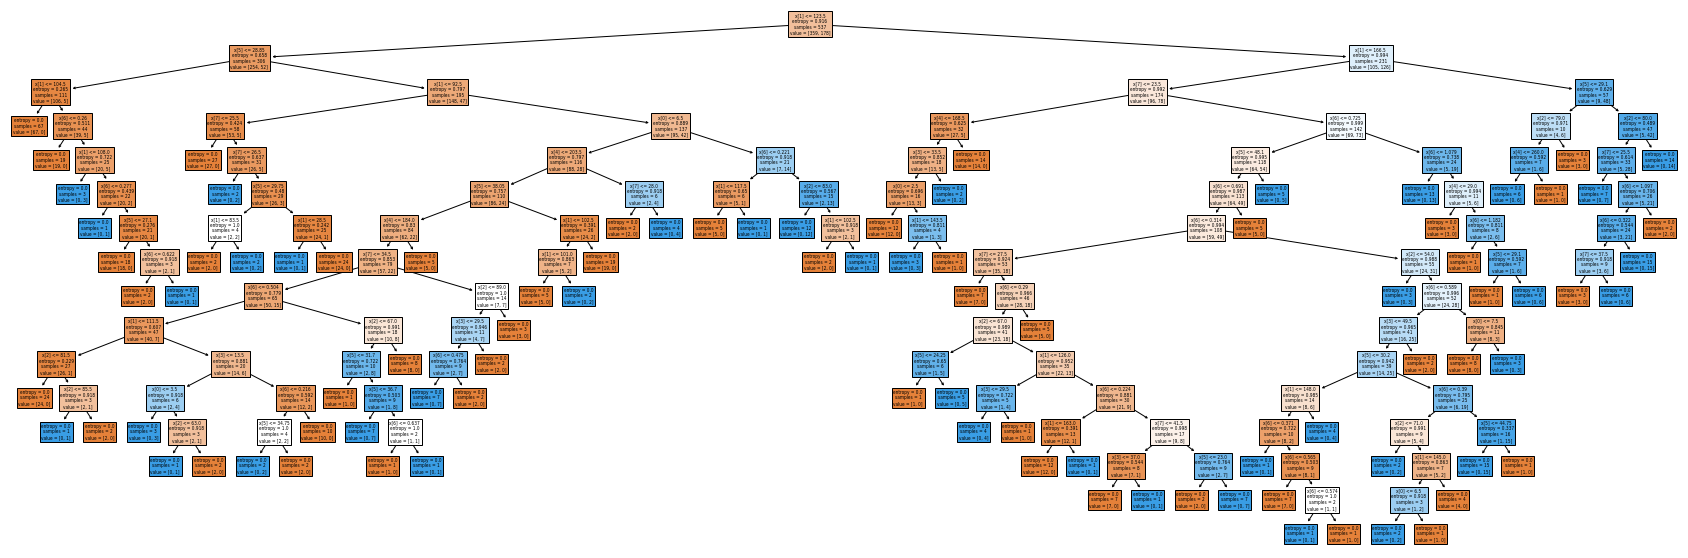

In [37]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(model ,filled=True)

# PREPRUNING 

In [38]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [39]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.4551282051282051, 0.9166666666666666, 'x[1] <= 123.5\nentropy = 0.916\nsamples = 537\nvalue = [359, 178]'),
 Text(0.16025641025641027, 0.75, 'x[5] <= 28.85\nentropy = 0.658\nsamples = 306\nvalue = [254, 52]'),
 Text(0.05128205128205128, 0.5833333333333334, 'x[1] <= 104.5\nentropy = 0.265\nsamples = 111\nvalue = [106, 5]'),
 Text(0.02564102564102564, 0.4166666666666667, 'entropy = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[6] <= 0.26\nentropy = 0.511\nsamples = 44\nvalue = [39, 5]'),
 Text(0.05128205128205128, 0.25, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.10256410256410256, 0.25, 'x[1] <= 108.0\nentropy = 0.722\nsamples = 25\nvalue = [20, 5]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1282051282051282, 0.08333333333333333, 'entropy = 0.439\nsamples = 22\nvalue = [20, 2]'),
 Text(0.2692307692307692, 0.5833333333333334, 'x[1] <= 92.5\nentropy = 0.797\nsamples

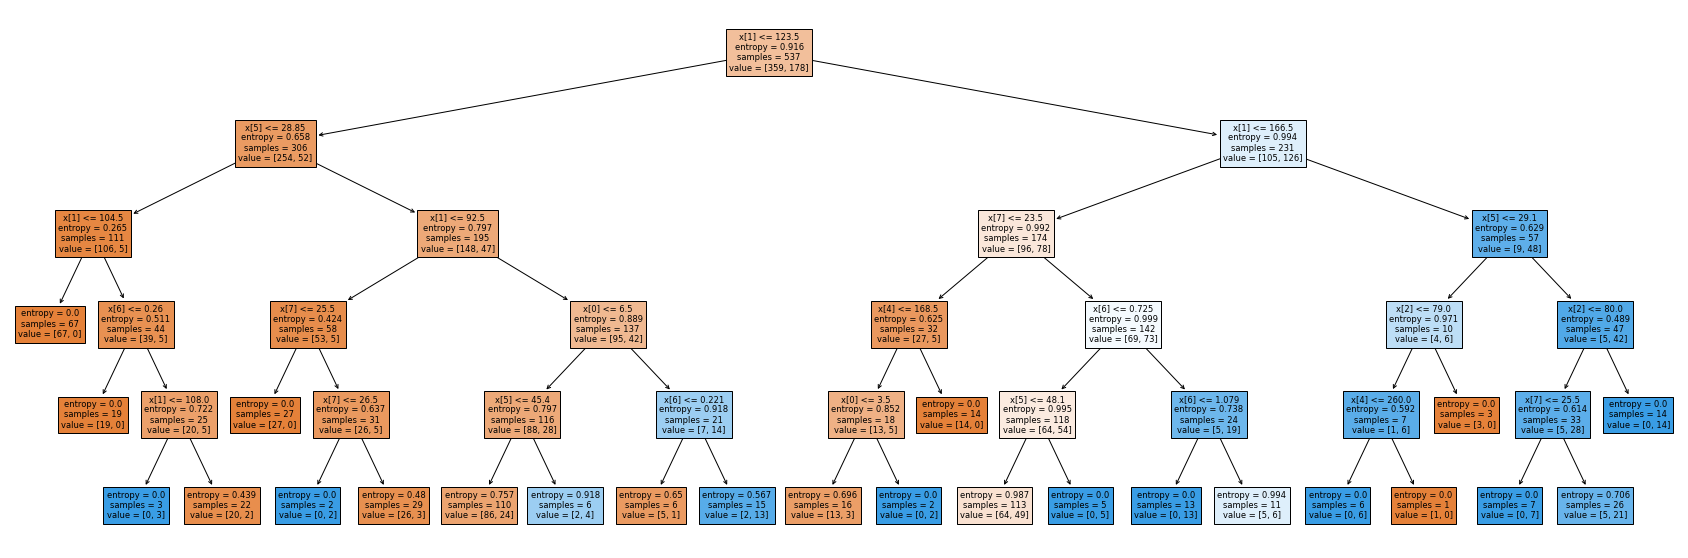

In [40]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(clf,filled=True)

# HYPERPARAMETER

In [41]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5, 6],
  'max_features':['sqrt', 'log2', 'auto']

}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
clf = DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid=parameter, cv = 5, scoring = "accuracy")

In [45]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [47]:
model.best_score_

0.7412253374870197